In [0]:
!pip install -U pandas
!pip install -U os
!pip install -U mathplotlib
!pip install -U seaborn
!pip install -U sklearn

In [0]:
import pandas as pd
import os

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.rc('font', **{'sans-serif' : 'Arial',
                         'family' : 'sans-serif'})

In [76]:
from google.colab import drive
drive.mount('/content/gdrive')

output_path = "/content/gdrive/My Drive/[DD]Colab Notebooks/Others/FinalExamination2018/data/output" 
my_path = "/content/gdrive/My Drive/[DD]Colab Notebooks/Others/FinalExamination2018/data/bang_diem_63_tinh_2018"
list_files = os.listdir(my_path)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
location = []
with open(os.path.join(my_path, 'README.md'), 'r') as file:
    im_step = 10  # Start of important rows
    current_step = 0  # count to important step
    
    for line in file:
        if current_step < 6:
            current_step += 1
            continue
            
        city_name = line.split('|')[1]  # Get the city name
        location.append(city_name.strip())
        
len(location)

In [79]:
df = {}
df_all = pd.DataFrame()

for file in list_files:
    # out loop if not csv file
    if '.csv' not in file:
        continue
    locate_num = int(file.replace('.csv', '')) - 1  # Start from 0

    df[location[locate_num]] = pd.read_csv(os.path.join(my_path, file), header=0, encoding='utf-8')  # Each province
    df_all = pd.concat([df_all, df[location[locate_num]]])  # All provinces
    
len(df)

63

#Correlation

In [0]:
df_corr_subject = df.iloc[:, 1:12].corr()
df_corr_block = df.iloc[:, 12:].corr()

In [0]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(15, 5))

sns.heatmap(df_corr_subject.corr(), ax = ax[0])
sns.heatmap(df_corr_block.corr(), ax = ax[1])

## Môn Lý

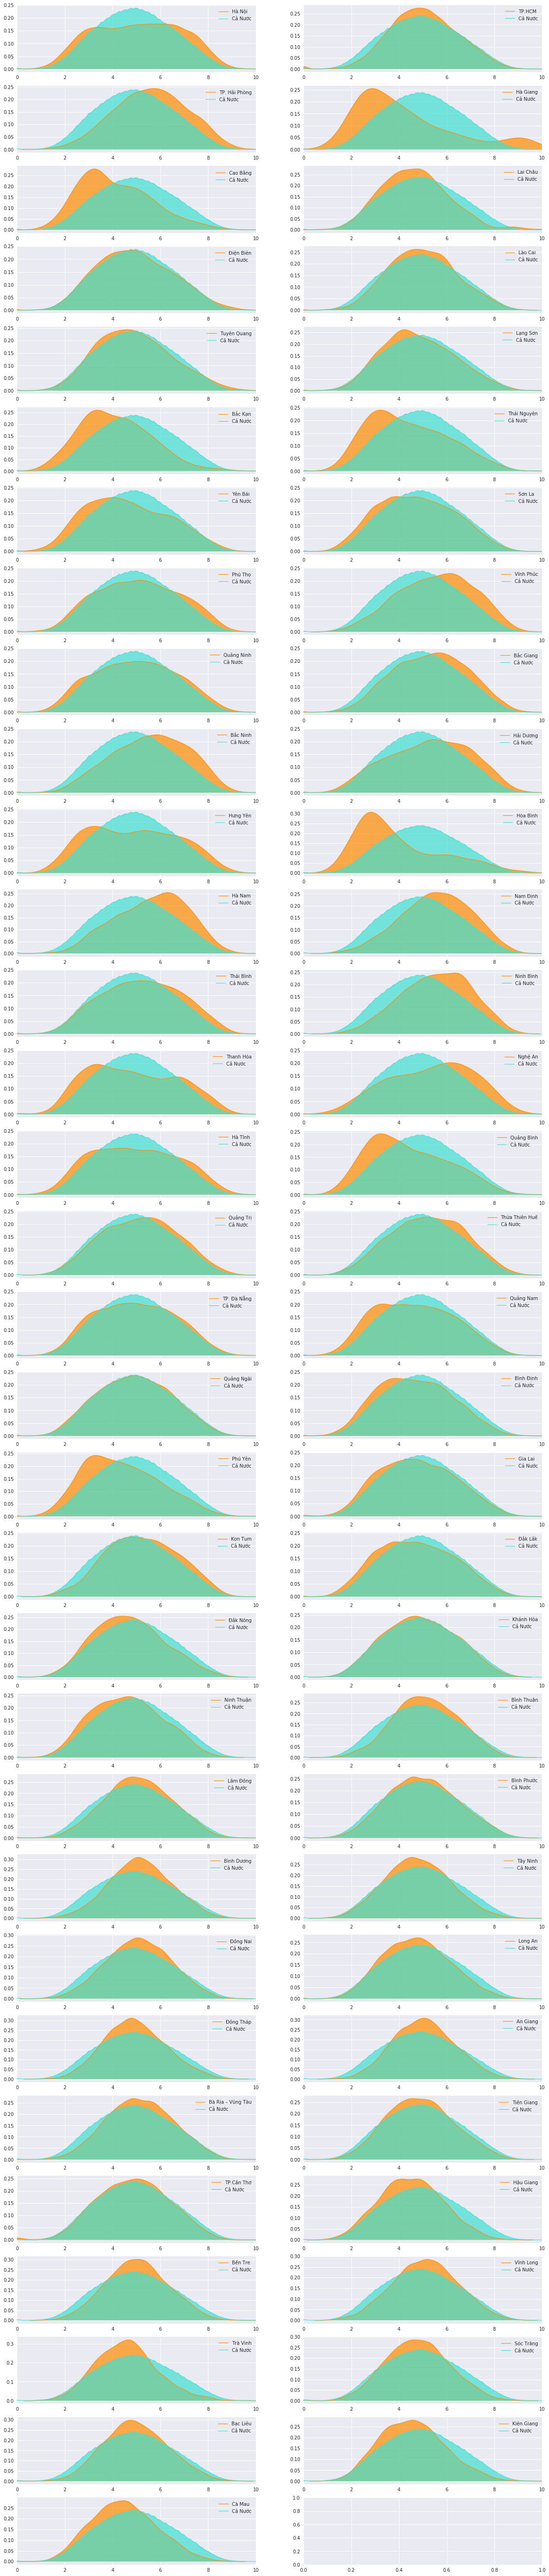

In [82]:
fig, ax = plt.subplots(nrows=32, ncols=2, figsize = (20, 100))

for i in range(0, len(location)): 
    sns.kdeplot(df[location[i]].iloc[:, 3].dropna(), shade = True, color='darkorange', alpha=0.7, ax=ax[i//2][i%2])
    sns.kdeplot(df_all.iloc[:, 3].dropna(), shade = True, color='turquoise', alpha=0.7, ax=ax[i//2][i%2])
    
    ax[i//2][i%2].legend([location[i], 'Cả Nước'])
    ax[i//2][i%2].set_xlim(0, 10)
    
    
fig.savefig(os.path.join(output_path, 'result.png'))